In [90]:
#**********************************
# Image Evaluation Methods Demo
# Showcase evaluation methods that will be used to compare a
#  ground truth image with an upscaled predicted image.
# 
# Majority of code taken from skimage demo:
#  https://scikit-image.org/docs/dev/auto_examples/transform/plot_ssim.html
# 
# Manuel Serna-Aguilera
# Spring 2021
#**********************************


In [91]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import data, img_as_float
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim


In [92]:
# PSNR function call
# https://scikit-image.org/docs/dev/api/skimage.metrics.html#skimage.metrics.peak_signal_noise_ratio

# SSIM function call
# https://scikit-image.org/docs/dev/api/skimage.metrics.html#skimage.metrics.structural_similarity

In [93]:
# Get image
#img = img_as_float(data.camera())
#img = img_as_float(data.coins())
#img = img_as_float(data.grass())
img = img_as_float(data.moon())
rows, cols = img.shape


In [94]:
# Generate noise to add to original image
noise = np.ones_like(img) * 0.2 * (img.max() - img.min())
noise[np.random.random(size=noise.shape) > 0.5] *= -1

img_noise = img + noise # image with random noise


In [95]:
# Compute PSNR and SSIM of images
# Ideal PSNR score: higher GENERALLY == better (in decibels--dB)
# Ideal SSIM score: 1.0

# As there is no "error", we would get a divide by 0 error in PSNR
#psnr_none = psnr(img, img, data_range=img.max() - img.min())
psnr_none = float("inf") 
ssim_none = ssim(img, img, data_range=img.max() - img.min())

psnr_noise = psnr(img, img_noise, 
                  data_range=img_noise.max()-img_noise.min())
ssim_noise = ssim(img, img_noise, 
                  data_range=img_noise.max()-img_noise.min())


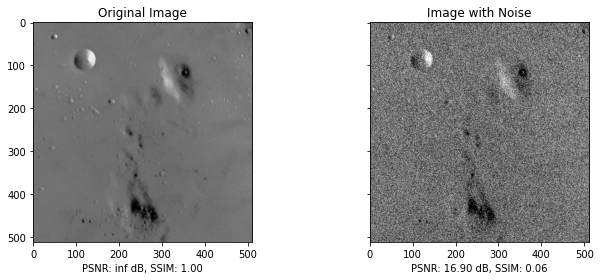

In [96]:
# Plot our results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), 
                         sharex=True, sharey=True)
ax = axes.ravel()
label = 'PSNR: {:.2f} dB, SSIM: {:.2f}'

# Original
ax[0].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(label.format(psnr_none, ssim_none))
ax[0].set_title('Original Image')

# Random noise
ax[1].imshow(img_noise, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(label.format(psnr_noise, ssim_noise))
ax[1].set_title('Image with Noise')

plt.tight_layout()
plt.show()